In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
#Scaling and Splitting
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split

#Modeling
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

#Evaluation
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

/kaggle/input/trailer-prices/trailerdata1.csv
/kaggle/input/trailer-prices/trailerdata2.csv


# About this notebook
This notebook aims to predict the price of a product (trailer) for an early stage start-up. The data has been anonymized. Due to the web infrastructure of manufacturers of similar trailers, the data was collected by hand. This project is still on-going and updated regularly. 

## Current Challenges
The data has been collected by hand as it was formatted differently for nearly every row. Some points have been imputed by hand elsewhere, based off of photos, educated guesses and industry knowledge. Enough data has been collected so that feature engineering is now underway. One major point is how to encompass the information about number of doors and windows, experimenting with different ways of tackling these columns is currently underway. 

In [2]:
#The trailer price data is saved in a csv file and must first be loaded
data = pd.read_csv('/kaggle/input/trailer-prices/trailerdata1.csv', sep=';')
data.head(5)

,Manufacturer,model,total dry weight,length,Cabin exterior width,exterior height,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,...,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,USB Cost,Base price
0,Sunset Park RV,Sunray 109E,1660,198.0,102.0,84.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14879
1,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,12500
2,Sunset Park RV,Sunray Classic 109,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14997
3,Sunset Park RV,Sunray Classic 129,1930,185.0,102.0,105.0,73.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,15965
4,Sunset Park RV,Classic 149,2260,188.0,102.0,108.0,74.0,On Road,Yes,Yes,...,Yes,Option,Yes,Yes,No,Yes,Yes,Yes,0,18689


In [3]:
#inspect the data types of each column
#for modeling everything needs to be and int or float
data.dtypes

Manufacturer                      object
model                             object
total dry weight                   int64
length                           float64
Cabin exterior width             float64
exterior height                  float64
interior height highest point    float64
Usage Intent- On or Off Road      object
A/C                               object
Roof Rack                         object
Driver Side Window                object
Driver Side Door                  object
Driver Side Door Window           object
Passenger Side Door               object
Passenger Side Door Window        object
Passenger Side Window             object
Spare Tire                        object
Battery Power Supply              object
Cabinets                          object
Refrigerator                      object
Awning                            object
Solar                             object
STOVE                             object
USB Charging                      object
USB Cost        

In [4]:
#checking for missing values
#missing values must be dealt with for ML modeling
data.isna().sum()

Manufacturer                     0
model                            5
total dry weight                 0
length                           0
Cabin exterior width             0
exterior height                  0
interior height highest point    0
Usage Intent- On or Off Road     0
A/C                              0
Roof Rack                        0
Driver Side Window               0
Driver Side Door                 0
Driver Side Door Window          0
Passenger Side Door              0
Passenger Side Door Window       0
Passenger Side Window            0
Spare Tire                       0
Battery Power Supply             0
Cabinets                         0
Refrigerator                     0
Awning                           0
Solar                            0
STOVE                            0
USB Charging                     0
USB Cost                         0
Base price                       0
dtype: int64

There are no missing values because the data has been imputed by hand beforehand. 

In [5]:
data.shape

(96, 26)

In [6]:
#these columns will be renamed to remove the space in the heading 
data = data.rename(columns={"exterior height": "eheight", "total dry weight": "tdweight", "interior height":"intheight", "exterior width":"ewidth", "Base price":"price"})

In [7]:
data['Passenger Side Door Window'].value_counts()

Yes       71
Option    19
No         6
Name: Passenger Side Door Window, dtype: int64

In [8]:
#data2['intheight'] = data2['intheight'].fillna(data2['intheight'].mean())
#data2['ewidth'] = data2['ewidth'].fillna(data2['ewidth'].mean())

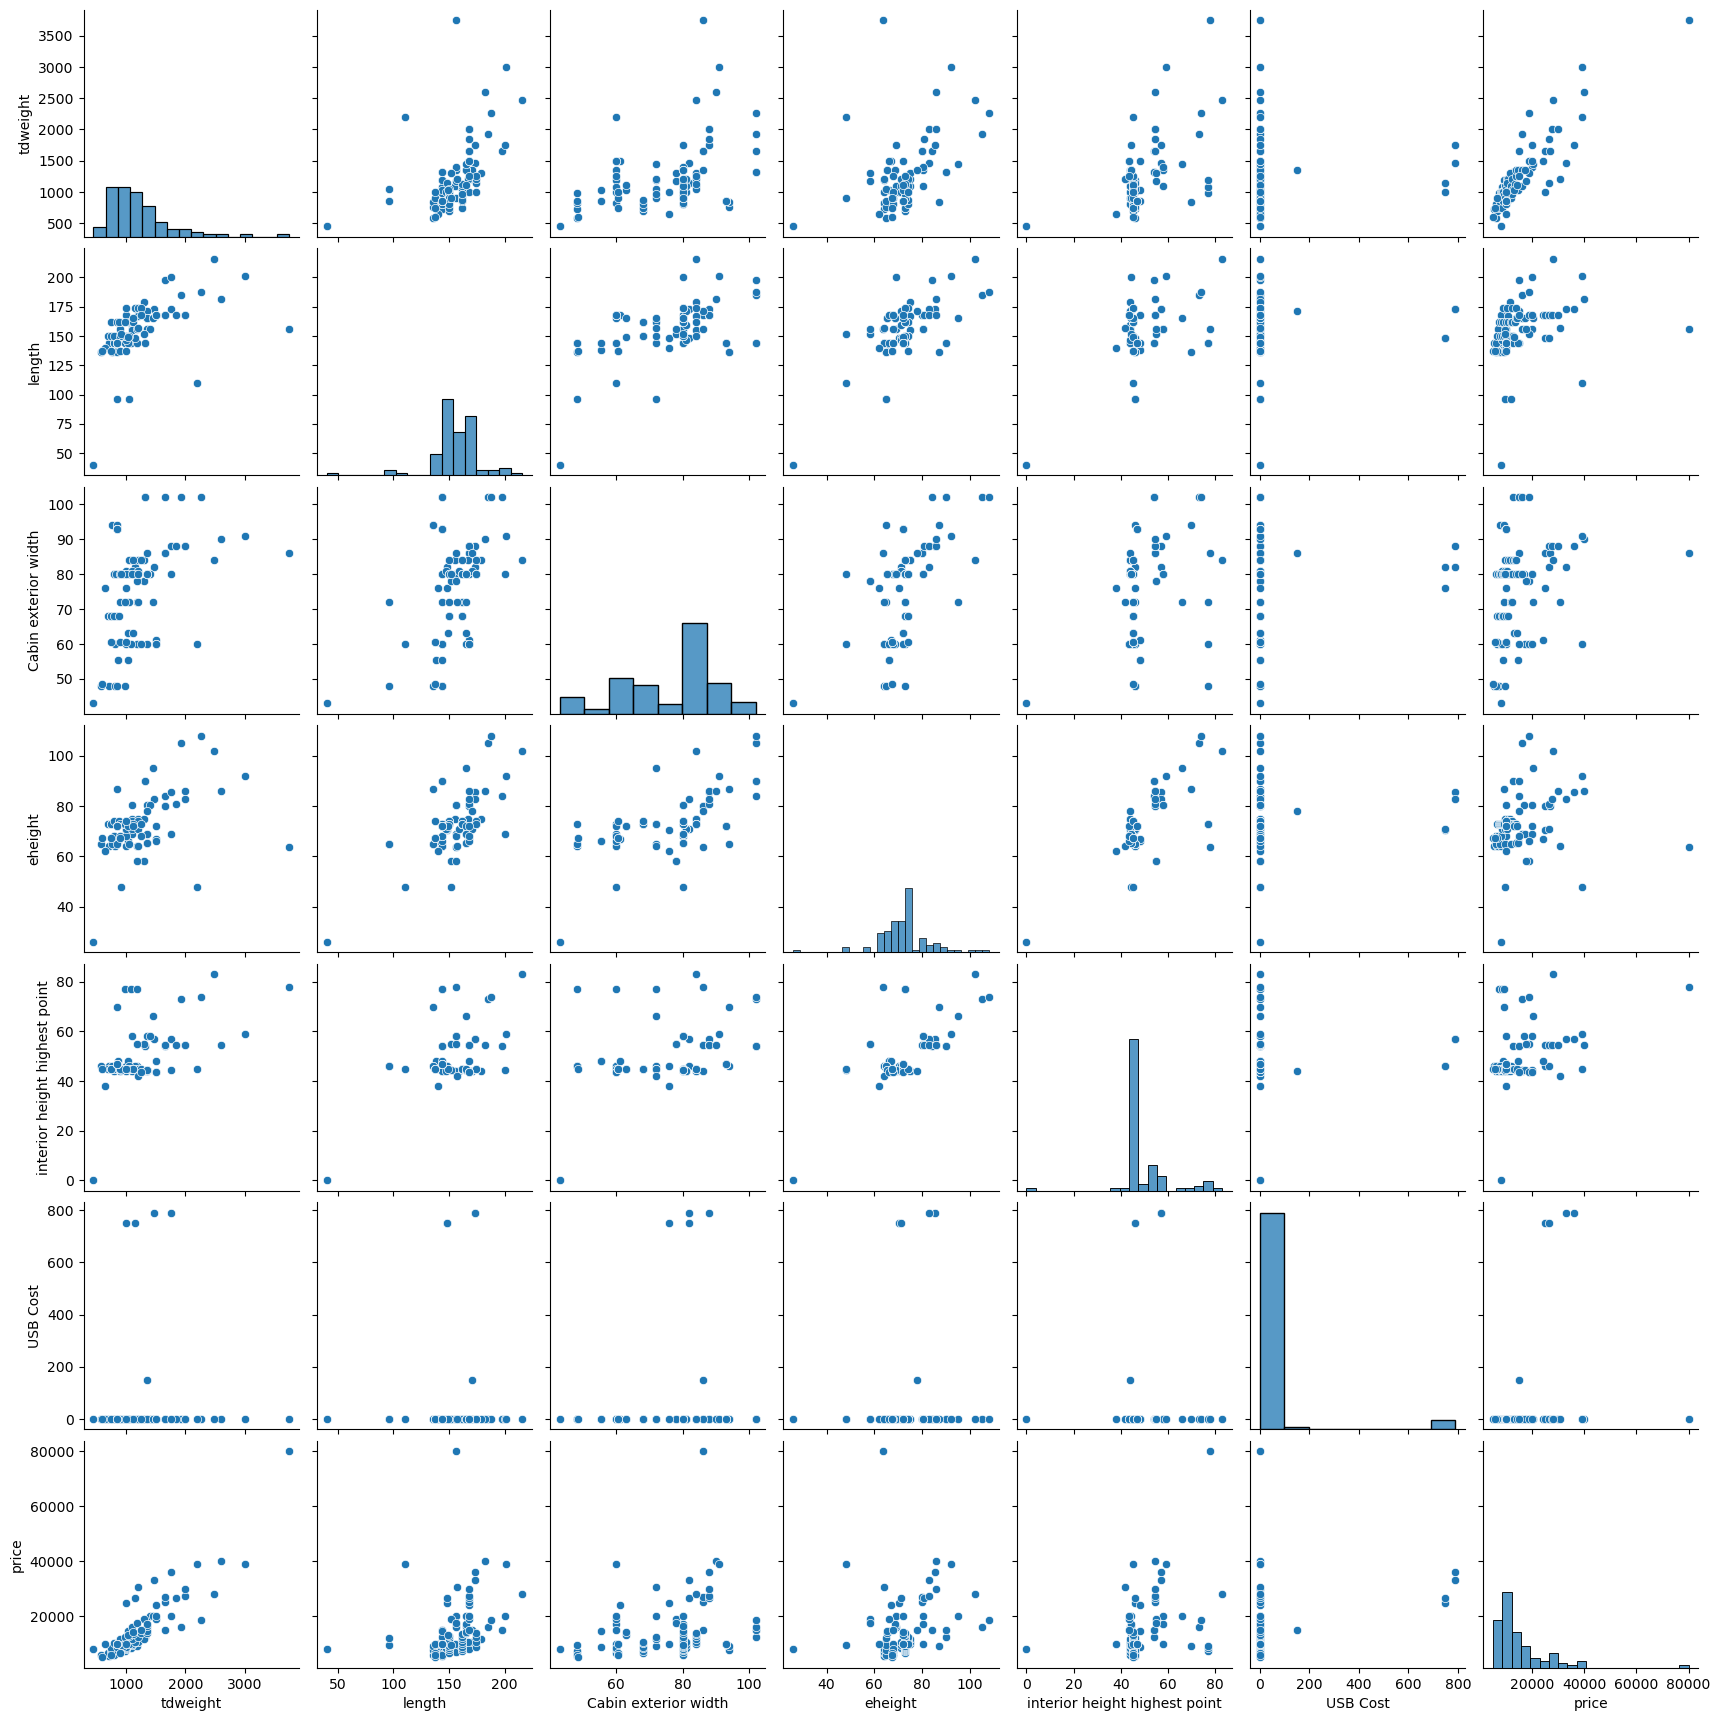

In [9]:
sns.pairplot(data)

Of all the variables, total dry weight appears to be the most correlated with the price. Let's look at it a bit more closely. 

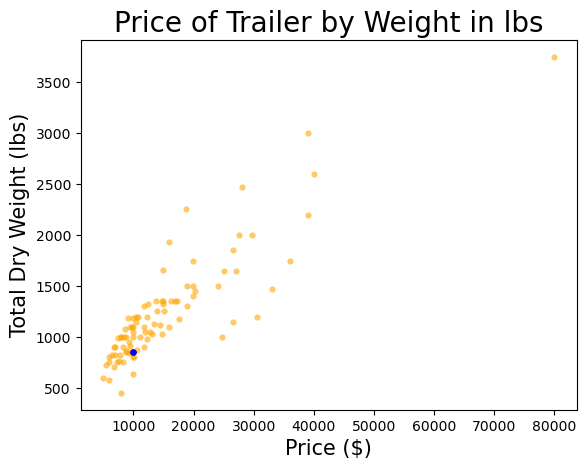

In [10]:
# values of x
x=data['price']
y= data['tdweight']

col = []
  
for i in range(0, len(x)):
    #the target trailer in blue
    if x[i]==9995:
        col.append('blue')  
    #all other trailers in orange
    else:
        col.append('orange') 
  
for i in range(len(x)):
      
    # plotting the corresponding x with y 
    # and respective color
    plt.scatter(x[i], y[i], c = col[i], s = 20,
                linewidth = 0, alpha=0.6)
    plt.title("Price of Trailer by Weight in lbs", fontsize=20)
    plt.ylabel("Total Dry Weight (lbs)", fontsize=15)
    plt.xlabel("Price ($)", fontsize=15)
      
plt.show()

Now let's look at how a few features map onto the weight vs. price

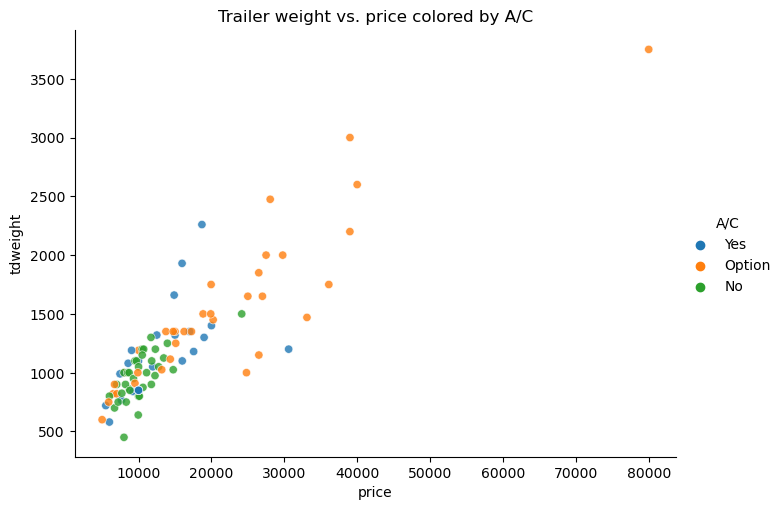

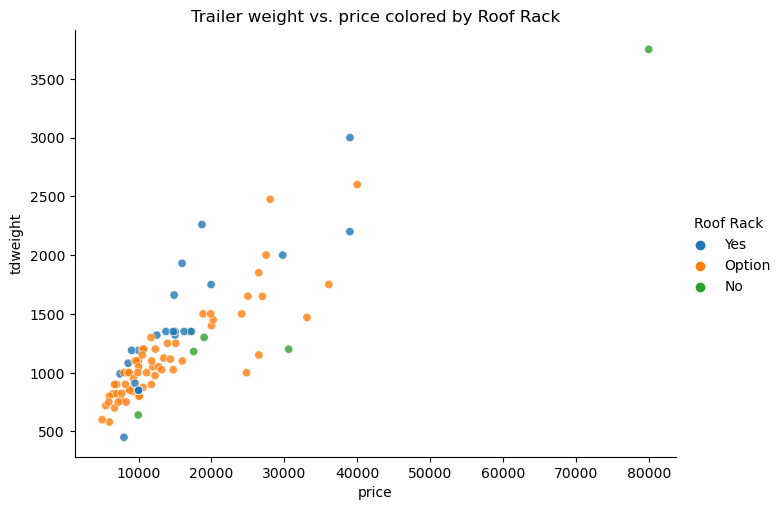

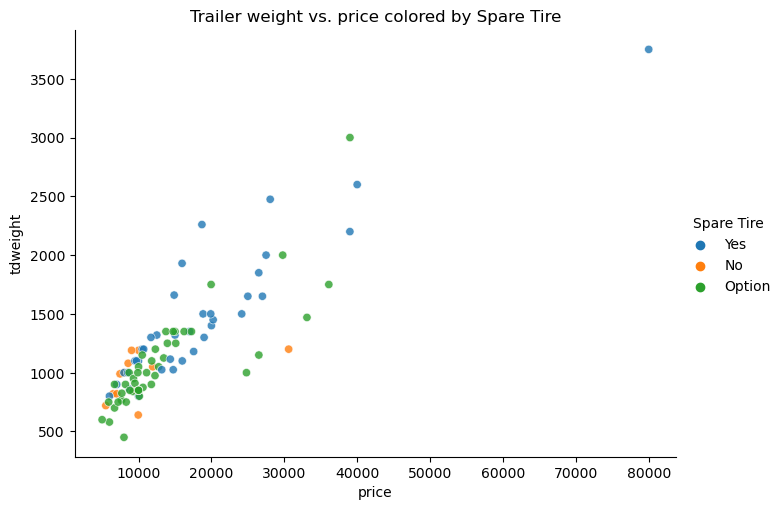

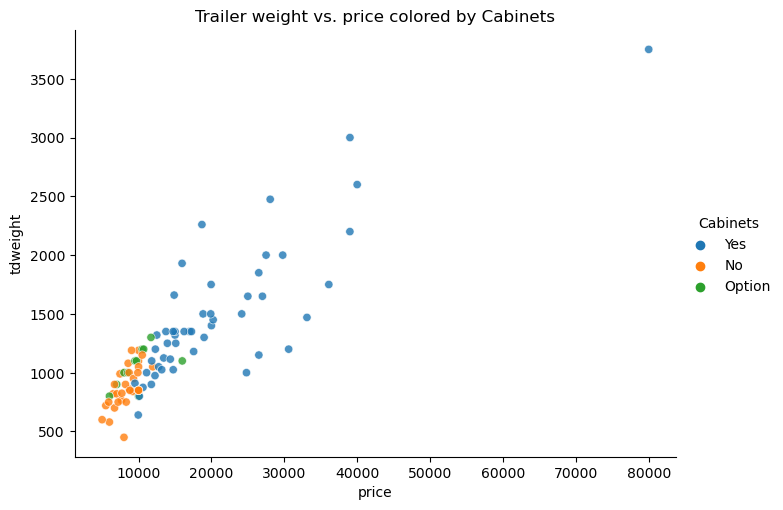

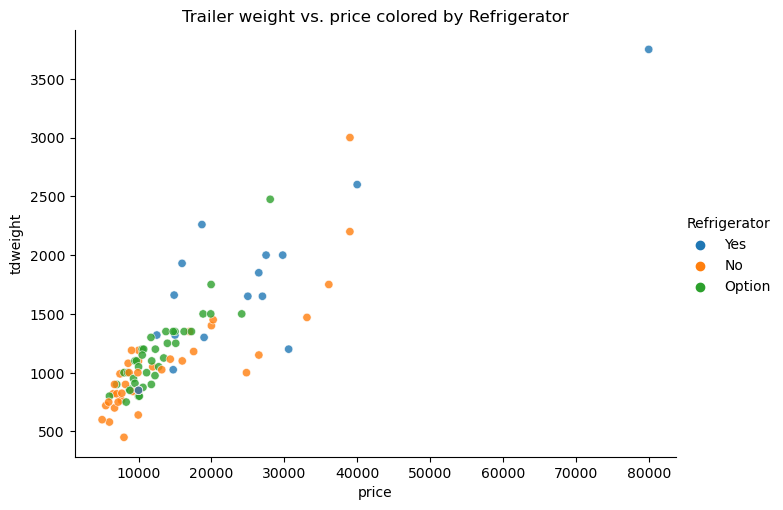

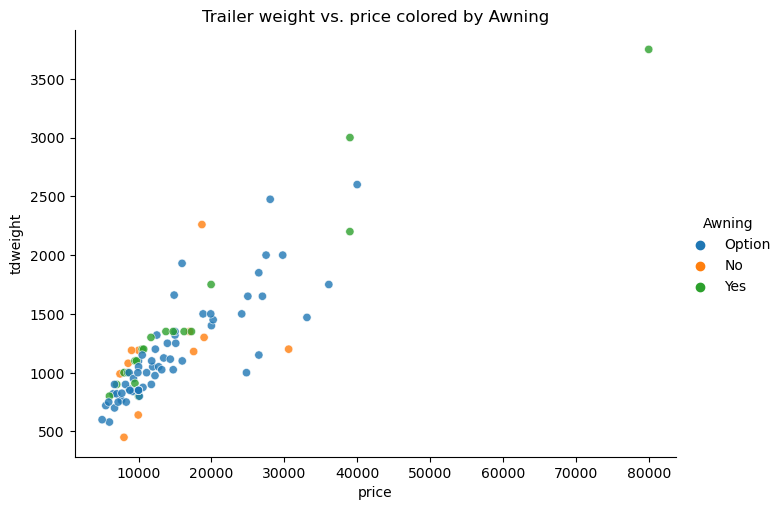

In [11]:
for c in ['A/C', 'Roof Rack', 'Spare Tire', 'Cabinets', 'Refrigerator', 'Awning']:
    sns.relplot(data=data, x='price', y='tdweight', hue=f"{c}", aspect=1.4, alpha=0.8)
    plt.title(f'Trailer weight vs. price colored by {c.title()}')
    plt.show()

In [12]:
data["Windows"] = data["Driver Side Window"] + data["Passenger Side Window"]
data["Doors"] = data["Driver Side Door"] + data["Passenger Side Door"]
data["Door Windows"] = data["Driver Side Door Window"] + data["Passenger Side Door Window"]

In [13]:
data = data[['tdweight', 'length', 'Cabin exterior width', 'eheight', 'interior height highest point', 'Usage Intent- On or Off Road', 'A/C', 'Roof Rack', 'Windows', 'Doors', 'Door Windows', 'Spare Tire', 'Battery Power Supply', 'Cabinets', 'Refrigerator', 'Awning', 'Solar', 'STOVE', 'USB Charging', 'USB Cost', 'price']]

In [14]:
data

,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Windows,Doors,...,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,USB Cost,price
0,1660,198.0,102.0,84.0,54.0,On Road,Yes,Yes,YesYes,NoYes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14879
1,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,YesYes,NoYes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,12500
2,1320,144.0,102.0,90.0,54.0,On Road,Yes,Yes,YesYes,NoYes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,14997
3,1930,185.0,102.0,105.0,73.0,On Road,Yes,Yes,YesYes,NoYes,...,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes,0,15965
4,2260,188.0,102.0,108.0,74.0,On Road,Yes,Yes,YesYes,NoYes,...,Yes,Option,Yes,Yes,No,Yes,Yes,Yes,0,18689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,850,144.0,93.0,72.0,47.0,On Road/Off Road,Yes,Yes,NoYes,NoYes,...,Option,No,No,No,Option,No,No,No,0,9995
92,850,144.0,93.0,72.0,47.0,On Road/Off Road,Yes,Yes,NoYes,NoYes,...,Option,No,No,No,Option,No,No,Yes,0,9995
93,850,144.0,93.0,72.0,47.0,On Road/Off Road,Yes,Yes,NoYes,NoYes,...,Option,No,No,No,Option,No,Yes,Yes,0,9995
94,850,144.0,93.0,72.0,47.0,On Road/Off Road,Yes,Yes,NoYes,NoYes,...,Option,No,No,No,Option,Yes,Yes,Yes,0,9995


In [15]:
#select the categorical data for encoding
cat_data = data.iloc[:, 5:19]
cat_data

,Usage Intent- On or Off Road,A/C,Roof Rack,Windows,Doors,Door Windows,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging
0,On Road,Yes,Yes,YesYes,NoYes,NoYes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
1,On Road,Yes,Yes,YesYes,NoYes,NoYes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
2,On Road,Yes,Yes,YesYes,NoYes,NoYes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
3,On Road,Yes,Yes,YesYes,NoYes,NoYes,Yes,Option,Yes,Yes,Option,Yes,Yes,Yes
4,On Road,Yes,Yes,YesYes,NoYes,NoYes,Yes,Option,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,On Road/Off Road,Yes,Yes,NoYes,NoYes,YesYes,Option,No,No,No,Option,No,No,No
92,On Road/Off Road,Yes,Yes,NoYes,NoYes,YesYes,Option,No,No,No,Option,No,No,Yes
93,On Road/Off Road,Yes,Yes,NoYes,NoYes,YesYes,Option,No,No,No,Option,No,Yes,Yes
94,On Road/Off Road,Yes,Yes,NoYes,NoYes,YesYes,Option,No,No,No,Option,Yes,Yes,Yes


In [16]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#label encode the data to prepare for modeling
#label encoding is preferred for categorical variables

for col in cat_data:
    data[col] = labelencoder.fit_transform(data[col])
 
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tdweight,length,Cabin exterior width,eheight,interior height highest point,Usage Intent- On or Off Road,A/C,Roof Rack,Windows,Doors,...,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,USB Cost,price
0,1660,198.0,102.0,84.0,54.0,1,2,2,4,1,...,2,1,2,2,1,2,2,2,0,14879
1,1320,144.0,102.0,90.0,54.0,1,2,2,4,1,...,2,1,2,2,1,2,2,2,0,12500
2,1320,144.0,102.0,90.0,54.0,1,2,2,4,1,...,2,1,2,2,1,2,2,2,0,14997
3,1930,185.0,102.0,105.0,73.0,1,2,2,4,1,...,2,1,2,2,1,2,2,2,0,15965
4,2260,188.0,102.0,108.0,74.0,1,2,2,4,1,...,2,1,2,2,0,2,2,2,0,18689


In [17]:
#dropping columns which aren't useful or have very negative correlations
data = data.drop(['interior height highest point', 'USB Cost', 'Roof Rack', 'Usage Intent- On or Off Road', 'A/C'], axis=1)

In [18]:
#make a copy of the data for later
data2=data

In [19]:
corr=data2.corr()
corr

,tdweight,length,Cabin exterior width,eheight,Windows,Doors,Door Windows,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,price
tdweight,1.000000,0.521120,0.383462,0.437361,0.154157,0.016591,-0.081029,0.382148,0.554536,0.548321,0.436766,0.178002,0.332057,0.513358,0.268035,0.876003
length,0.521120,1.000000,0.469431,0.645245,0.082781,0.268045,0.284213,0.330261,0.373805,0.471059,0.392385,0.225914,0.227764,0.244650,0.443257,0.299917
Cabin exterior width,0.383462,0.469431,1.000000,0.576307,0.015944,-0.175434,-0.002675,0.378452,0.056221,0.310798,0.424305,0.183494,0.391910,0.321489,0.409569,0.258535
eheight,0.437361,0.645245,0.576307,1.000000,0.282978,-0.072250,-0.088336,0.291755,0.181967,0.261529,0.294331,-0.037643,0.328066,0.186338,0.368576,0.196200
Windows,0.154157,0.082781,0.015944,0.282978,1.000000,-0.092231,-0.284651,0.005678,0.060246,0.049853,0.203822,-0.354010,0.011152,-0.090805,0.036150,0.016994
Doors,0.016591,0.268045,-0.175434,-0.072250,-0.092231,1.000000,0.629714,-0.207317,0.161294,0.187568,0.078342,0.045618,-0.137014,-0.173145,0.045201,0.027302
Door Windows,-0.081029,0.284213,-0.002675,-0.088336,-0.284651,0.629714,1.000000,-0.134340,0.005455,0.133106,0.127577,0.068429,0.017903,0.006800,0.118928,-0.011218
Spare Tire,0.382148,0.330261,0.378452,0.291755,0.005678,-0.207317,-0.134340,1.000000,0.394288,0.440309,0.446380,0.337546,0.371698,0.313536,0.344890,0.291442
Battery Power Supply,0.554536,0.373805,0.056221,0.181967,0.060246,0.161294,0.005455,0.394288,1.000000,0.620253,0.390310,0.182690,0.174862,0.290658,0.636905,0.499754
Cabinets,0.548321,0.471059,0.310798,0.261529,0.049853,0.187568,0.133106,0.440309,0.620253,1.000000,0.509437,0.137084,0.372516,0.382017,0.454269,0.555660


<AxesSubplot:>

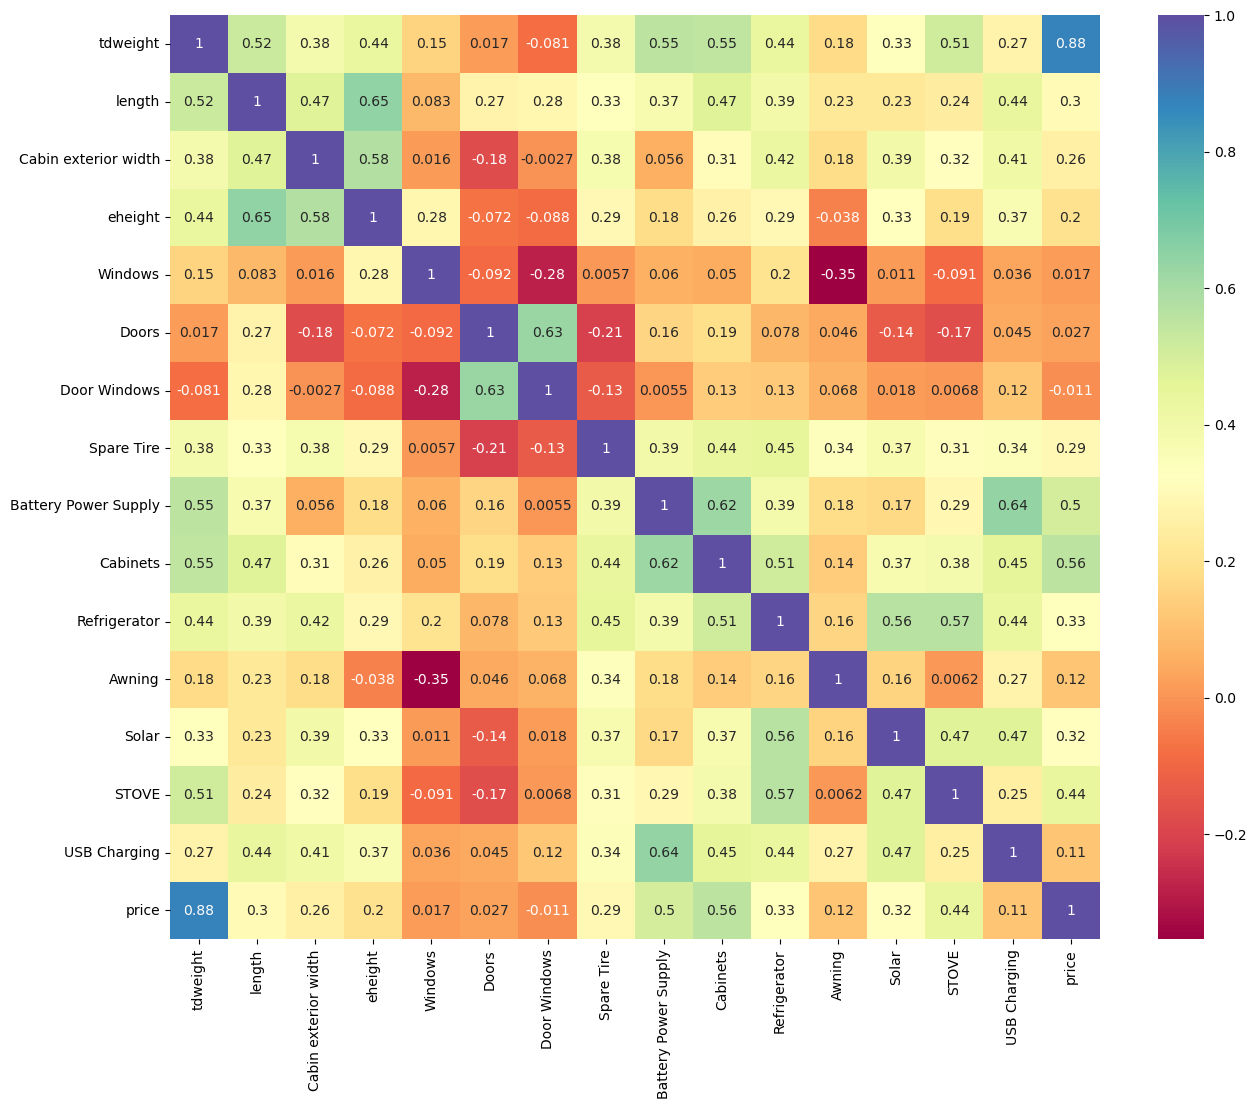

In [20]:
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True,cmap="Spectral")

# Machine Learning Modeling
The data is now clean and we can move forward with creating some machine learning models. Once we settle on the best model it can be used to predict the target price of the trailer in question.

In [21]:
#data2 = data2.rename(columns={"Base price":"price"})

In [22]:
data2=data2.drop(data.index[91:])

In [23]:
#here the data is split up into X,y where X contains everything but price and y contains what we want to predict (price)
#price is what we want to predict
X = data2.drop(['price'],axis=1)
y=data2['price']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [25]:
#scaling the data
#this usually helps with modeling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
#function which runs different ML models and prints R^2, MAE and RMSE
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    #EVALUATION OF THE MODEL
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    # Plotting y_test and y_pred 
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

Now the data is all cleaned up and ready for creating some machine learning models. A funtion has been written to run various models and output metrics 

R^2 :  0.7018144915860063
MAE : 3221.570751694206
RMSE: 4258.396900827195


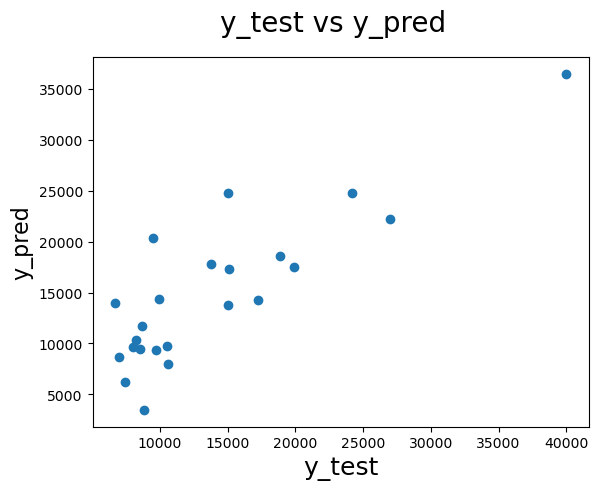

In [27]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.636619561268941
MAE : 2605.4347826086955
RMSE: 4700.928469809009


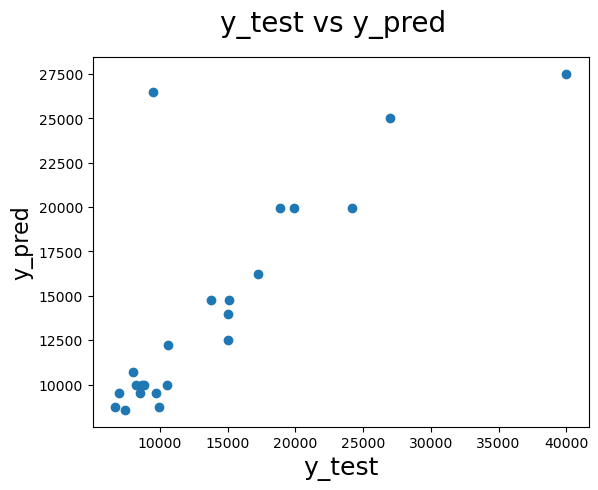

In [28]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.5151217747754209
MAE : 4627.132464866375
RMSE: 5430.242333876117


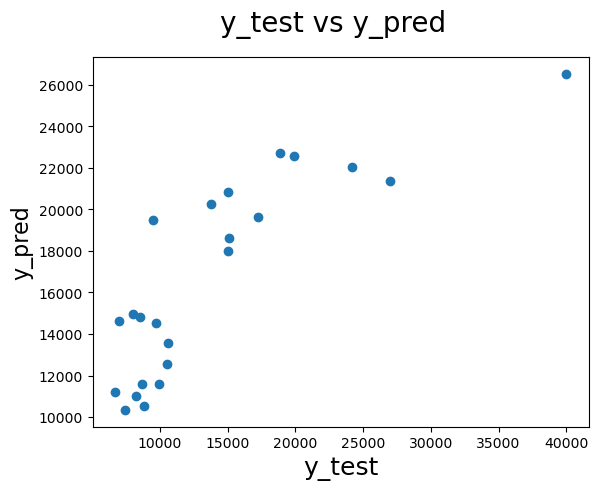

In [29]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8857505754608083
MAE : 2363.2778937720673
RMSE: 2635.9057719833386


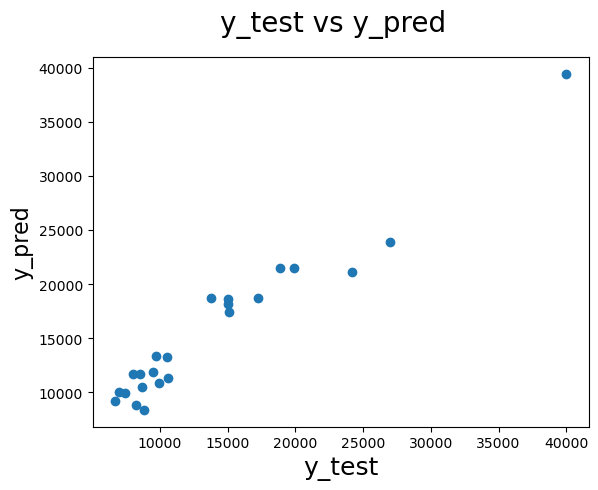

In [30]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.7182832743924242
MAE : 3123.2701263688928
RMSE: 4139.131140763643


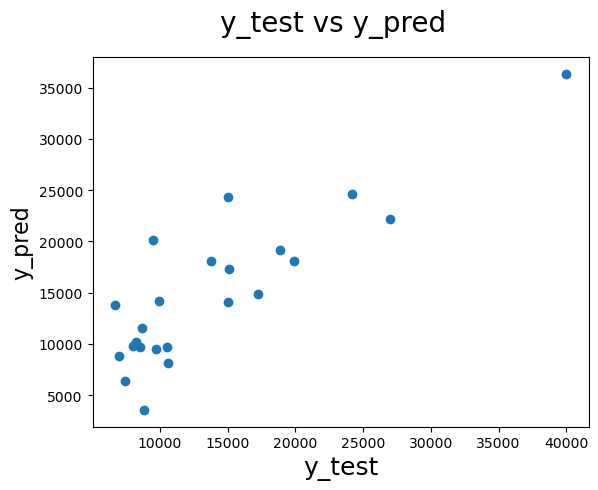

In [31]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.726148589034004
MAE : 3081.060322564299
RMSE: 4080.9414311605224


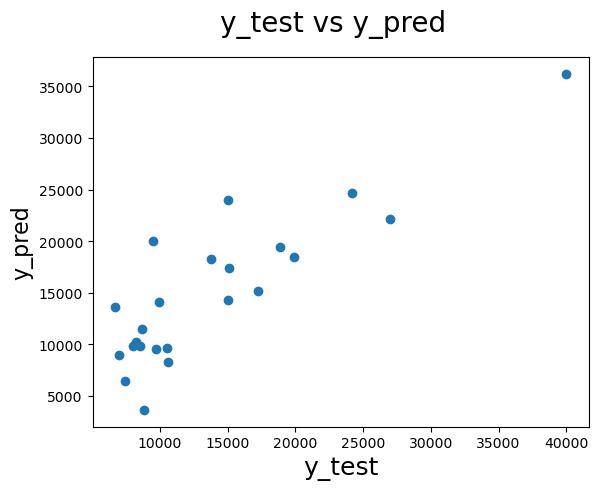

In [32]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.73312053430366
MAE : 3052.8616737611896
RMSE: 4028.6584572631327


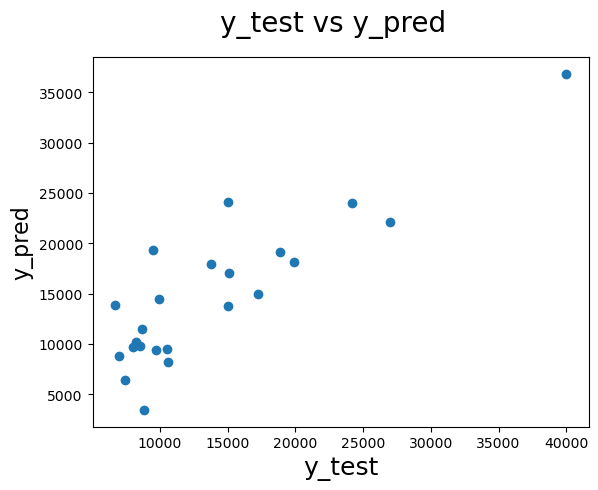

In [33]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.05195005837906441
MAE : 5593.25832705386
RMSE: 7998.350496878845


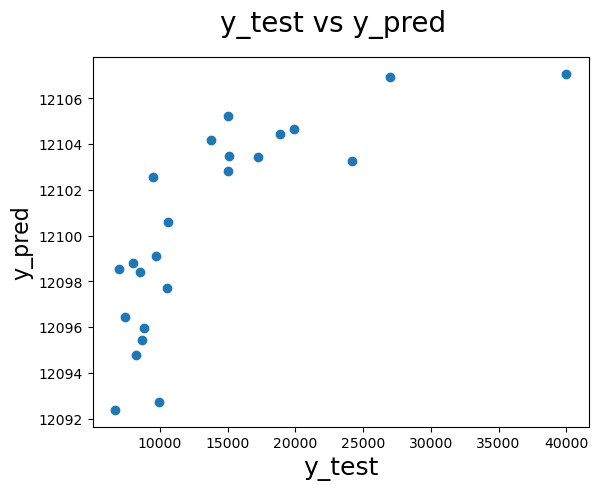

In [34]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.7926412718281804
MAE : 2640.501094924401
RMSE: 3551.10922636606


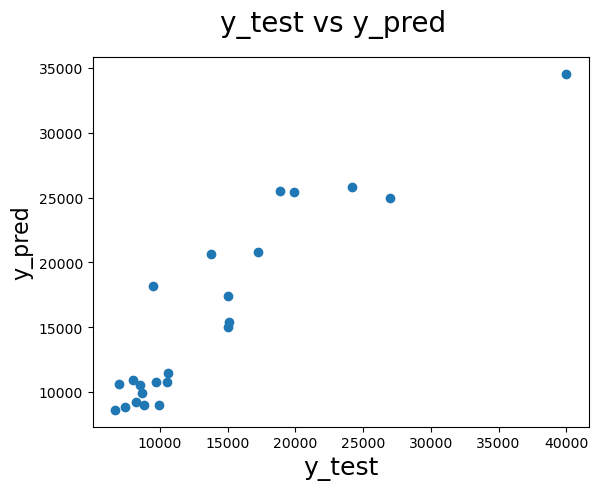

In [35]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

Unsurprisingly, RandomForest preformed better than all the other models tested. Therefore we will move forward with tuning hyperparameters to figure out which produce the best result.

# Checking Feature Importance

The features which have been included thus far are based on features that have enough data available online to realistically include, and picking out which ones are actually important is still in progress. Currently, a more novel feature information (e.g. solar panels) are being mined, while others whihc are already included need to be optimized. One feature which is currently in process of engineering is the number of doors and if they include windows. the information is currently held in 4 seperate columns which have low correlation to the price, and should be combined into a single column containing all of the information to improve calculations. 

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data2.drop(['price'],axis=1)
y=data2['price']
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the columns
featureScores.columns = ['Specs','Score']  
print(featureScores.nlargest(20,'Score'))  

                   Specs         Score
0               tdweight  20119.806455
1                 length    287.938202
2   Cabin exterior width    209.611473
3                eheight    155.769411
13                 STOVE    111.500000
4                Windows     92.660569
9               Cabinets     60.752252
10          Refrigerator     60.470588
14          USB Charging     49.382114
12                 Solar     46.906250
8   Battery Power Supply     46.311881
5                  Doors     40.285714
6           Door Windows     36.125000
7             Spare Tire     27.952586
11                Awning     23.712121


[0.22111244 0.15760124 0.13807856 0.13362046 0.0397132  0.03431184
 0.0352696  0.03529975 0.03071657 0.03630532 0.02655128 0.03816202
 0.03084311 0.022137   0.02027761]


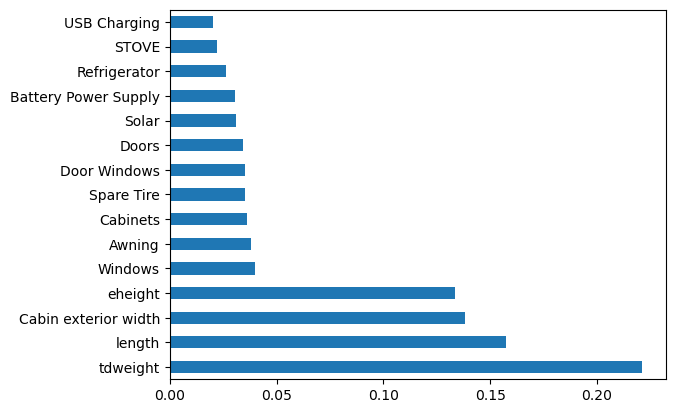

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

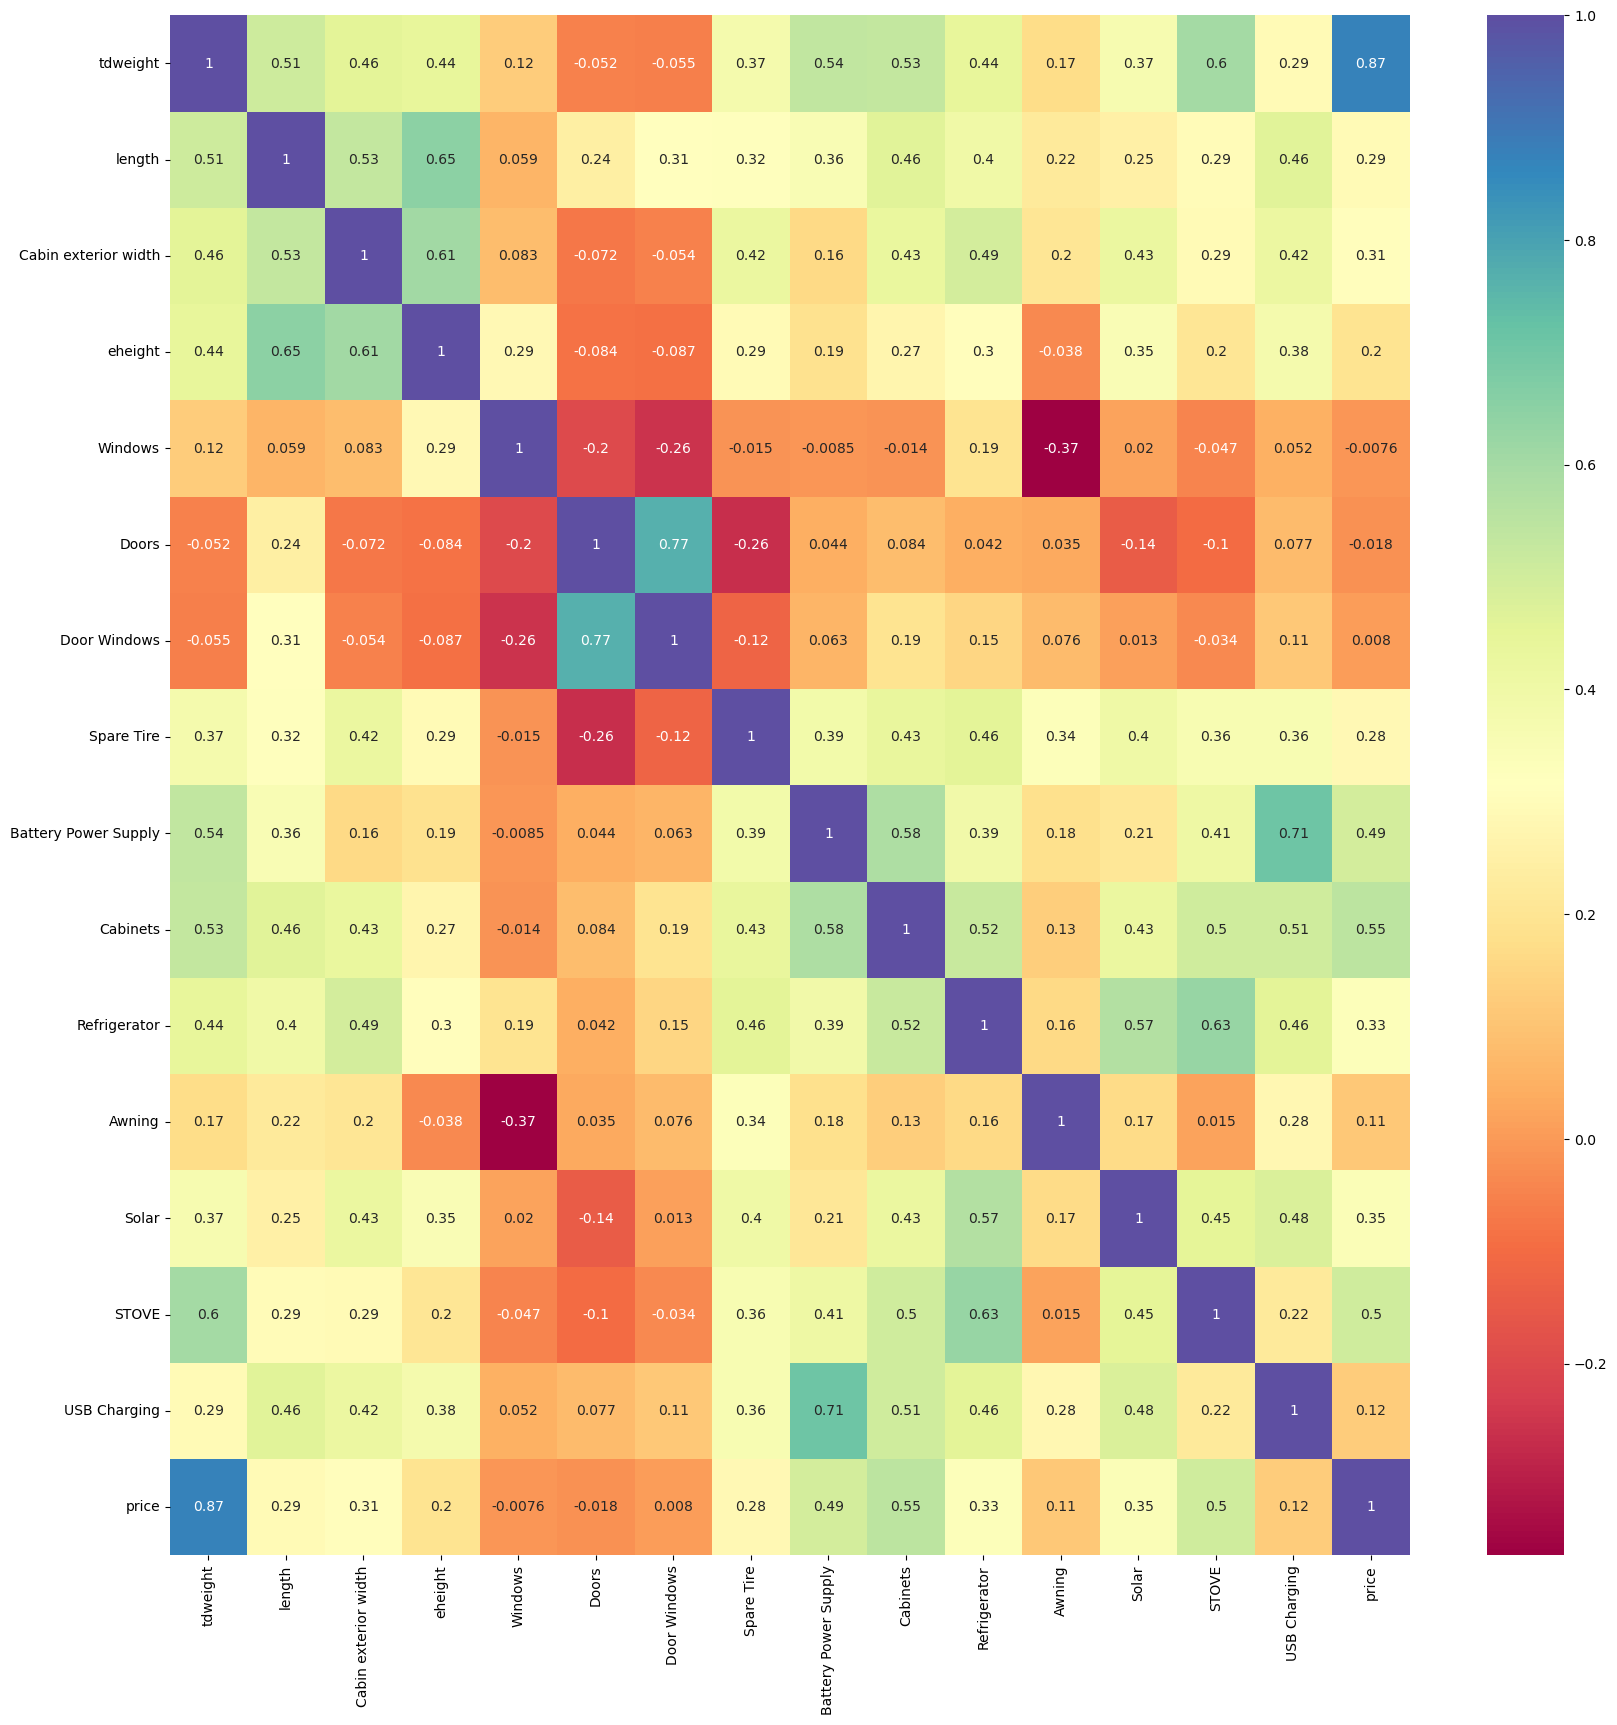

In [38]:
#get correlations of each features in dataset
corrmat = data2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data2[top_corr_features].corr(),annot=True,cmap="Spectral")

# Feature Engineering
This section is in progress while more feature data is collected.

In [39]:
#the last columns contain values we want to predict
data3=data.drop(data.index[91:])

In [40]:
#removing everything with a negative correlation
X = data3.drop(['price', 'Awning', 'Windows', 'Doors', 'Door Windows'],axis=1)
y=data3['price']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [43]:
def run_experiment(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
    #EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
    plt.xlabel('y_test', fontsize=18)                          # X-label
    plt.ylabel('y_pred', fontsize=16) 

R^2 :  0.675694457544666
MAE : 3282.3614846899873
RMSE: 4511.344485790843


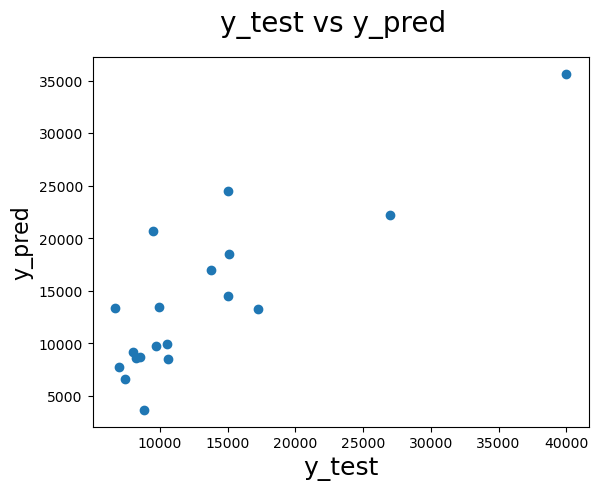

In [44]:
model_1 = LinearRegression()
run_experiment(model_1)

R^2 :  0.3137407684254915
MAE : 4276.0526315789475
RMSE: 6562.554232357366


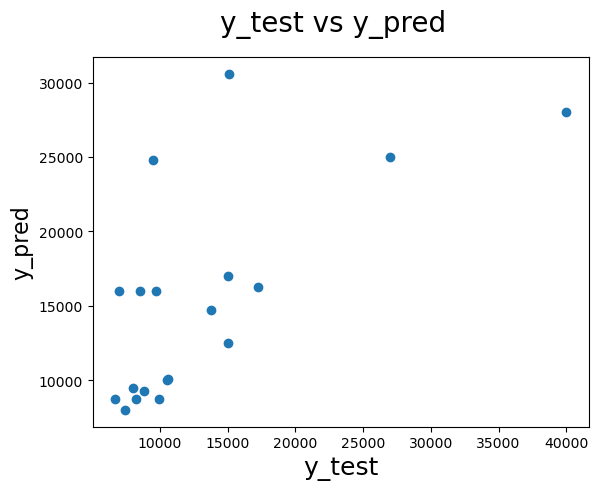

In [45]:
model_2 = DecisionTreeRegressor(random_state = 1)
run_experiment(model_2)

R^2 :  0.5574566165541461
MAE : 4508.107571500874
RMSE: 5269.952873257814


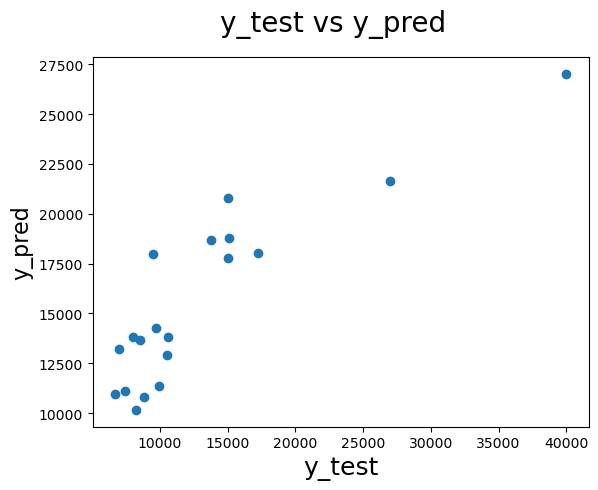

In [46]:
model_3 = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=1)
run_experiment(model_3)

R^2 :  0.8874666433208739
MAE : 2313.9788775083466
RMSE: 2657.4765580694707


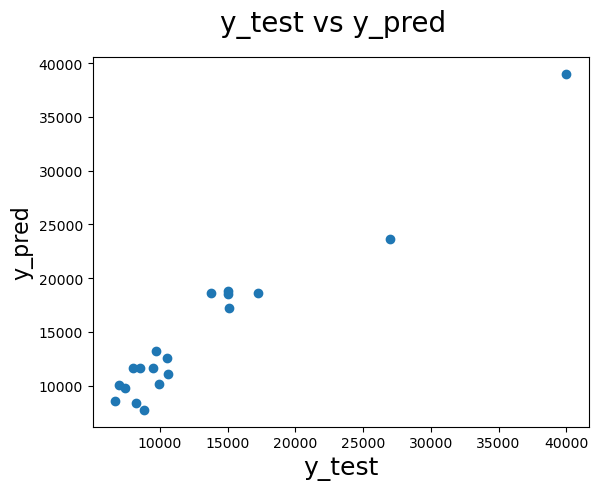

In [47]:
model_4 = Lasso(alpha=0.1, precompute=True, positive=True, selection='random', random_state=1)
run_experiment(model_4)

R^2 :  0.6972284869032286
MAE : 3187.882668499466
RMSE: 4358.994401156154


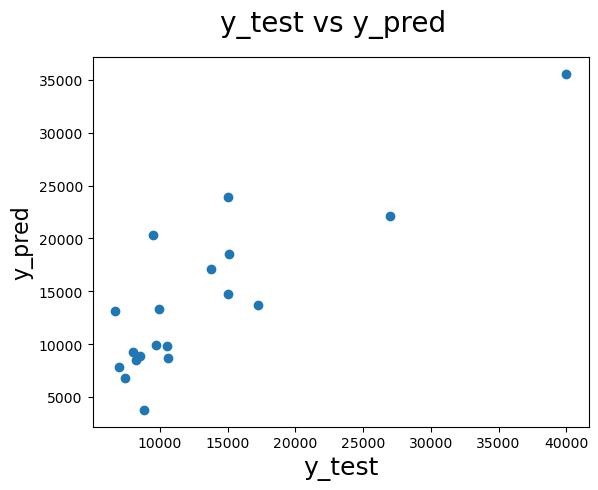

In [48]:
model_5 = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=1)
run_experiment(model_5)

R^2 :  0.6989371293633024
MAE : 3179.999225592448
RMSE: 4346.677356462325


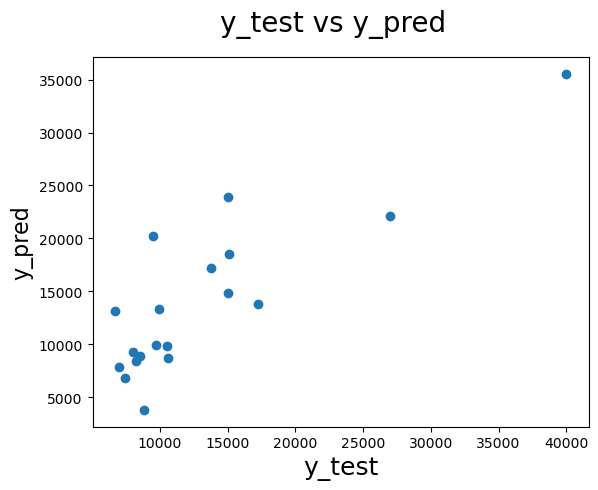

In [49]:
model_7 = BayesianRidge()
run_experiment(model_7)

R^2 :  0.7248783638206742
MAE : 3073.4778823420006
RMSE: 4155.192786971077


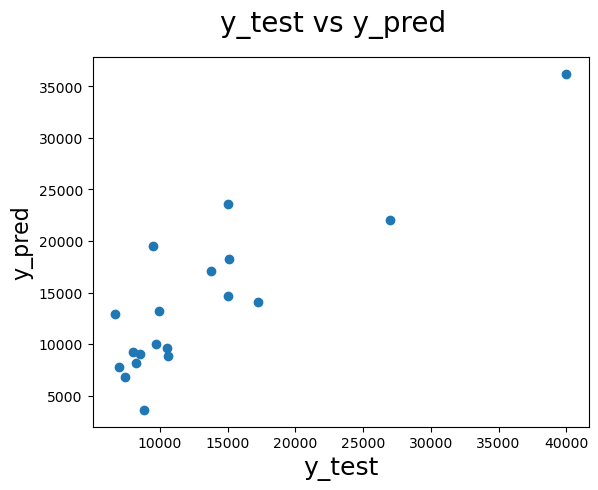

In [50]:
model_8 = SGDRegressor(max_iter=1000, tol=1e-3)
run_experiment(model_8)

R^2 :  -0.008538755058346448
MAE : 5237.252145356081
RMSE: 7955.639608827217


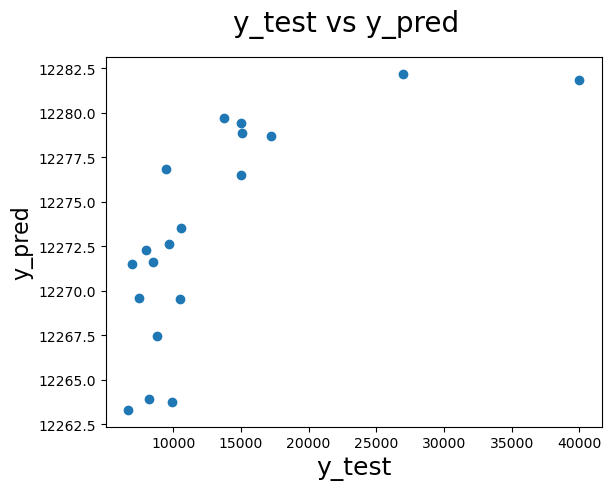

In [51]:
model_9 = SVR(epsilon=0.2)
run_experiment(model_9)

R^2 :  0.8749601414566844
MAE : 2259.2913100744304
RMSE: 2801.2575652652604


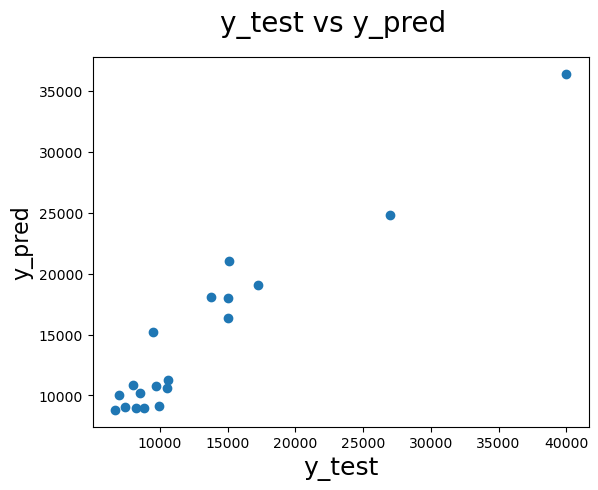

In [52]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

[0.25108679 0.16667988 0.16123598 0.16171582 0.0507251  0.03416195
 0.03884261 0.0379522  0.04287641 0.0243338  0.03038946]


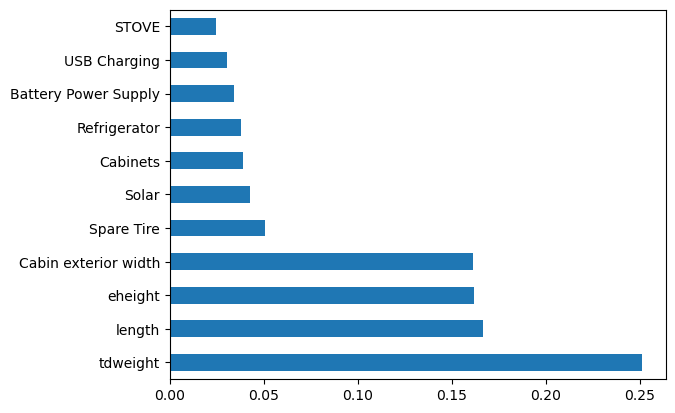

In [53]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Hyperparameter Tuning
Perhaps it is a bit early to get into hyperparameter tuning, but nonetheless the code is ready for once the dataset has been expanded :) Commented out for time saving purposes.

In [54]:
rfc=RandomForestRegressor(random_state=1)

In [55]:
param_grid = { 
    'n_estimators': [100, 500, 1000, 5000],
    #'max_features': ['auto', 'sqrt', 'log2'],
    #to save time in updating the notebook, max_depth is also left out
    'max_depth' : [5, 10, 15],
    # 'min_samples_leaf' : [1,2,3,5],
     #'criterion' :['squared_error', 'absolute_error', 'friedman_mse']
}


In [56]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 500, 1000, 5000]})

In [57]:
#print the best parameters determined in GridSearchCV
CV_rfc.best_params_

{'max_depth': 5, 'n_estimators': 100}

R^2 :  0.736466564608429
MAE : 2660.842261740598
RMSE: 4066.742433659082


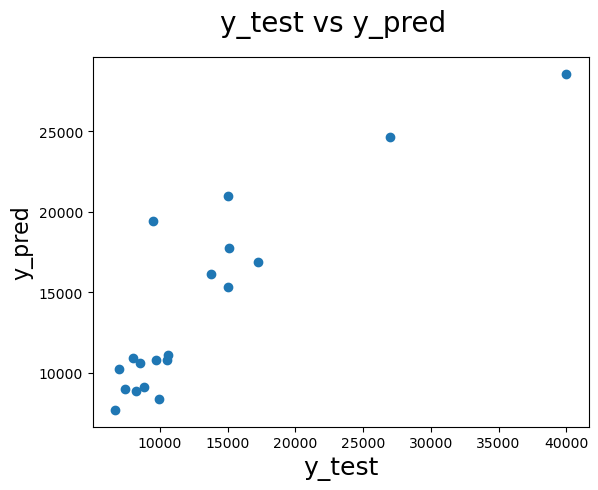

In [58]:
#run a final model using the optimal parameters
final_model = RandomForestRegressor(criterion= 'squared_error', n_estimators=1000, max_features='sqrt', max_depth=10, min_samples_leaf=1, random_state=1)
run_experiment(final_model)

# Checking the value of interest

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05)

In [60]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

R^2 :  0.9659014879000765
MAE : 1037.1736727494758
RMSE: 1149.8961331503713


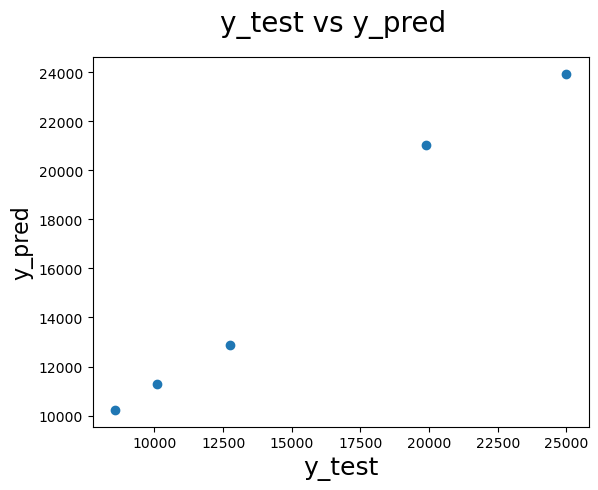

In [61]:
model_10 = RandomForestRegressor(n_estimators=100, min_samples_leaf=3, random_state=1)
run_experiment(model_10)

In [62]:
new_input = data.loc[91:]
new_input

,tdweight,length,Cabin exterior width,eheight,Windows,Doors,Door Windows,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Awning,Solar,STOVE,USB Charging,price
91,850,144.0,93.0,72.0,1,1,3,1,0,0,0,1,0,0,0,9995
92,850,144.0,93.0,72.0,1,1,3,1,0,0,0,1,0,0,2,9995
93,850,144.0,93.0,72.0,1,1,3,1,0,0,0,1,0,2,2,9995
94,850,144.0,93.0,72.0,1,1,3,1,0,0,0,1,2,2,2,9995
95,850,144.0,93.0,72.0,1,1,3,1,0,0,2,1,2,2,2,9995


In [63]:
#drop the variable to be predicted
new_input=new_input.drop(['price', 'Awning', 'Windows', 'Doors', 'Door Windows'],axis=1)
new_input

,tdweight,length,Cabin exterior width,eheight,Spare Tire,Battery Power Supply,Cabinets,Refrigerator,Solar,STOVE,USB Charging
91,850,144.0,93.0,72.0,1,0,0,0,0,0,0
92,850,144.0,93.0,72.0,1,0,0,0,0,0,2
93,850,144.0,93.0,72.0,1,0,0,0,0,2,2
94,850,144.0,93.0,72.0,1,0,0,0,2,2,2
95,850,144.0,93.0,72.0,1,0,0,2,2,2,2


In [64]:
new_input_scaled = scaler.fit_transform(new_input)

In [65]:
#CV?
new_output = final_model.predict(new_input_scaled)
new_output

array([12578.13304762, 12270.0429    , 13792.5754    , 13903.841375  ,
       14316.31475238])

# Notes on the metrics used
✔️ Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂𝑖|
1
n
∑
i
=
1
n
|
y
i
−
y
^
i
|
 

 
Mean Squared Error (MSE) is the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂𝑖)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾⎷
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
 
📌 Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm?scriptVersionId=117768677&cellId=36

<iframe src="https://www.kaggle.com/embed/faressayah/practical-introduction-to-10-regression-algorithm?cellIds=36&kernelSessionId=117768677" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Practical Introduction to 10 Regression Algorithm"></iframe>